# Module 3 Demo

# What is happening under the sea surface?

## Tidal Currents

A current is generated by a difference in the sea surface elevation between different points in space, which makes water move back and forth as the surface tilt changes in time. This water movement, dominated by tides, is known as TIDAL CURRENTS.

## Tidal Currents Stages
As for tides, there are different stages of the tidal current. 

Imagine we have the ocean on the left side and an estuary, like Puget Sound, in the right side. The two points are conected by a channel, like the Strait of San Juan de Fuca.

### Ebb Tide
When the sea level in the estuary is higher than in the ocean side, water will move out of the estuary towards the ocean. This type of tidal current is known as Ebb Tide.

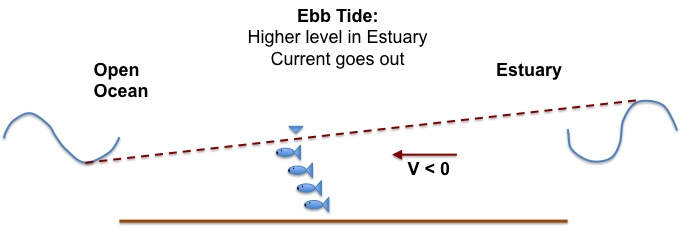

In [1]:
from IPython.display import Image
Image("Figures/EbbTideCurrent.jpg")

### Slack Tide
When the sea level in the estuary and in the ocean side are the same, water will not move to either side. This stage of zero water velocity is known as Slack Tide.

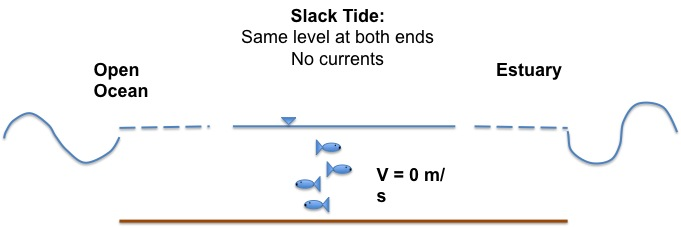

In [2]:
Image("Figures/SlackTide.jpg")

### Flood Tide
When the sea level in the ocean side is higher that in the estuary side, water will move inland (towards the estuary). This condition is known as Flood Tide.

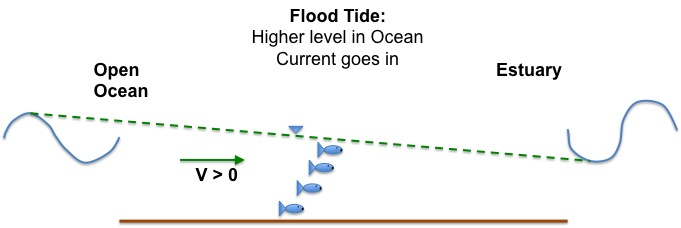

In [3]:
Image("Figures/FloodTideCurrent.jpg")

## Tidal Currents Exploration
Lets explore how the current behaves for varying conditions in the ocean and in the estuary. We have a simple model that will tell us how fast the water is going, and in which stage, depending on the difference in the sea elevation between the two channel ends.

In [4]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
from tydal.module3_utils import plot_currents
%matplotlib inline

In the following interactive plot you can calculate the velocity of the current between the ocean and the estuary, and know the stage of the tidal current. The following parameters determine the value of the velocity and its stage. 

- a1 = the amplitude of the tide in the ocean side (meters)
- a2 = the amplitude of the tide in the estuary side (meters)
- alpha = the phase difference, which is related to the delay of the tidal wave (degrees)
- N = time at which you want to see the velocity value and direction

Modify this parameters and see how the current is changes in time:

<function tydal.module3_utils.plot_currents>

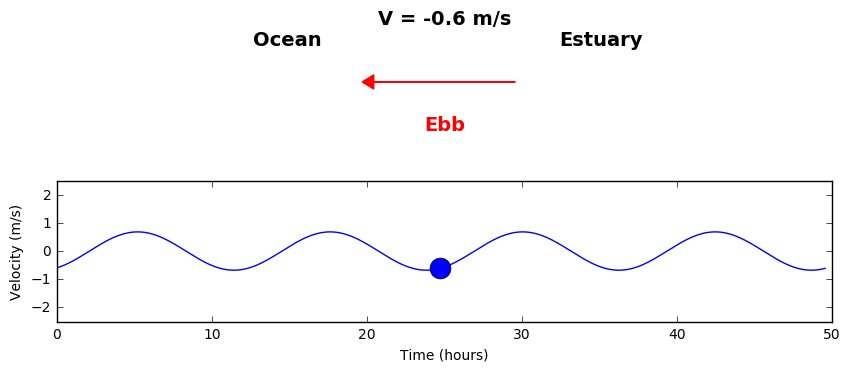

In [5]:
interact(plot_currents,T=fixed(12.42),a1=[0,4],a2=[0,4],alpha=(0,90),N=(0,399))

## Tidal Currents in Admiralty Inlet

Admiralty Inlet is the main entrance of Puget Sound from the Strait of San Juan de Fuca. The currents in this area depend on the difference in sea level between the outside of Puget Sound and the inside of it. 

Lets see what happends here. 
We will show you a time series of sea elevation at Port Townsend and a map of velocities across Admiralty Inlet.

Tidal currents data at Admiralty Inlet comes from the Ferry-Based Monitoring of Puget Sound Currents project, you can learn more about it in here http://www.apl.washington.edu/project/project.php?id=ferries_for_science.

In [6]:
import tydal.module3_utils as m3
import tydal.tide_utils as tu

In [7]:
URL1='http://107.170.217.21:8080/thredds/dodsC/Salish_L1_STA/Salish_L1_STA.ncml'

In [8]:
[ferry, ferry_download, message]=m3.ferry_data_download(URL1)

File is ok


This takes a long time...be patience!

In [9]:
ferryQC= m3.ferry_data_QC(ferry,6.5,4,4)

/Users/Maru/miniconda3/lib/python3.5/site-packages/xarray/core/variable.py:1046: RuntimeWarning: invalid value encountered in less
  if not reflexive


In [10]:
ferryQC = m3.count_route_num(ferryQC)

In [11]:
#import tides
pt_tide = tu.load_Port_Townsend('Data/')
pt_tide = pt_tide['Water Level']

In [12]:
start_date = '2016-10-01'
end_date = '2016-11-01'

<function tydal.module3_utils.plt_ferry_and_tide>

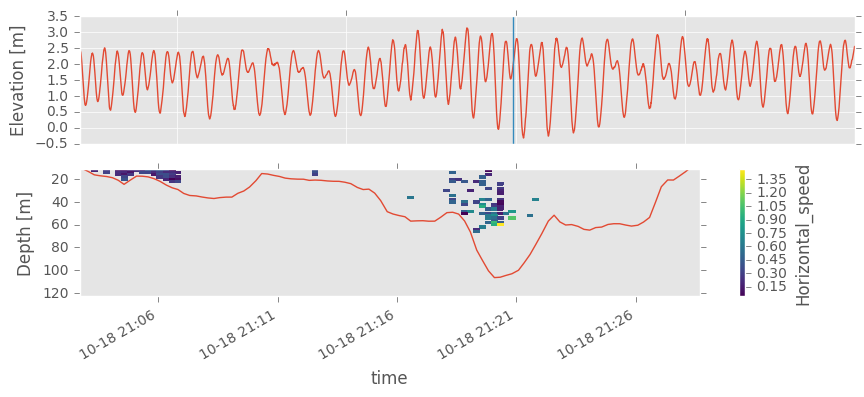

In [13]:
plt.style.use('ggplot')
%matplotlib inline
interact(m3.plt_ferry_and_tide, ferryQc=fixed(ferryQC), 
         pt_tide=fixed(pt_tide), crossing_index = (0,280),
        start_date = fixed(start_date), end_date = fixed(end_date))